# FM-223: Lista 6

Aluno: Vinícius Freitas de Almeida

# Exercício 1

Resolva o exercício T4.11 da p. 180, sobre o cálculo de boxdim dos inteiros de 1
a 100 e dos racionais em [0,1]. Você acha que o conjunto de números racionais em
[0,1] é fractal? Por quê?

## Parte 1: Inteiros de 1 a 100

Primeiro, vamos calcular o boxdim dos inteiros de 1 a 100. Para isso, basta considerar a fórmula:

$$d = \lim_{\varepsilon \to 0^+} \frac{\log N(\varepsilon)}{\log 1/\varepsilon}$$

Em que $N(\varepsilon)$ é o número de caixas de lado $\varepsilon$ necessárias para cobrir o conjunto. Para calcular $N(\varepsilon)$, basta perceber que precisamos de apenas 100 caixas de tamanho $\varepsilon$ para cobrir o conjunto, pois cada inteiro é um ponto. Assim, $N(\varepsilon) = 100$ e:

$$d = \lim_{\varepsilon \to 0^+} \frac{\log 100}{\log 1/\varepsilon} = \lim_{\varepsilon \to 0^+} \frac{\log 100}{-\log \varepsilon} = 0

## Parte 2: Racionais em [0,1]

Considerando, agora, o conjunto $S = \mathbb{Q} \cap [0,1$], precisamos calcular $N(\varepsilon)$ para cada $\varepsilon$. Perceba que, se entre as caixas(intervalos) de comprimento $\varepsilon$ exista alguma lacuna de tamanho $\delta > 0$, então não é possível cobrir $S$ com essas caixas. Portanto, todas as caixas devem ser intervalos imediatamente subsequentes (e.g. $[0, \varepsilon], [\varepsilon, 2\varepsilon], \dots$). Assim, $N(\varepsilon) = 1/\varepsilon + O(1)$ e, portanto:

$$d = \lim_{\varepsilon \to 0^+} \frac{\log ( 1/\varepsilon + O(1))}{\log 1/\varepsilon} = 1$$


Com tal resultado, chega-se à conclusão de que o conjunto dos racionais não é um fractal, uma vez que ter dimensão não-inteira é condição necessária para ser um fractal.

# Exercício 2

Obtenha a dimensão de contagem de caixas do atrator de Hénon como na fig. 4.16.

Atrator de Hénon:

$$x_{n+1} = a - x_n^2 + b y_n$$
$$y_{n+1} = x_n$$

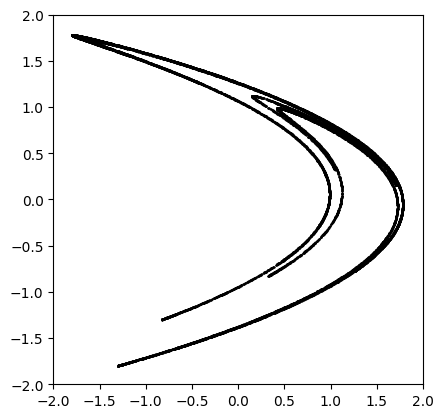

In [119]:
import numpy as np
import matplotlib.pyplot as plt

def plot_henon_attractor(ax, a, b):
    n = 20000
    cutoff = 500
    x = np.zeros(n)
    y = np.zeros(n)
    for i in range(n-1):
        x[i+1] = a - x[i] * x[i] + b * y[i]
        y[i+1] = x[i]

    x = x[cutoff:]
    y = y[cutoff:]

    # filter x to only x's such that |x| <= 2.5
    ids = np.where(np.abs(x) <= 2.5)
    y = y[ids]
    x = x[ids]

    ax.scatter(x, y, s=1, c='black', marker='.')

    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect(1.0)

fig, ax = plt.subplots()
plot_henon_attractor(ax, 1.4, 0.3)

In [120]:
def generate_henon_attractor(a, b, n, cutoff) -> (np.ndarray, np.ndarray):
    x = np.zeros(n)
    y = np.zeros(n)
    for i in range(n-1):
        x[i+1] = a - x[i] * x[i] + b * y[i]
        y[i+1] = x[i]

    x = x[cutoff:]
    y = y[cutoff:]

    # filter x to only x's such that |x| <= 2.5
    ids = np.where(np.abs(x) <= 2.5)
    y = y[ids]
    x = x[ids]

    return x, y

In [121]:
x, y = generate_henon_attractor(1.4, 0.3, 30000, 1000)

In [122]:
def count_hit_boxes(x, y, l):
    occupied_boxes = set()

    for i in range(len(x)):
        x_index = int(x[i] // l)
        y_index = int(y[i] // l)
        occupied_boxes.add((x_index, y_index))

    return len(occupied_boxes)

num = 100
eps = np.logspace(0, -8, base=2, num=num)
f = lambda l: count_hit_boxes(x, y, l)
n_eps = np.vectorize(f)(eps)

Text(0.5, 1.0, 'Figure 4.16 Box-counting dimension of the Hénon attractor.')

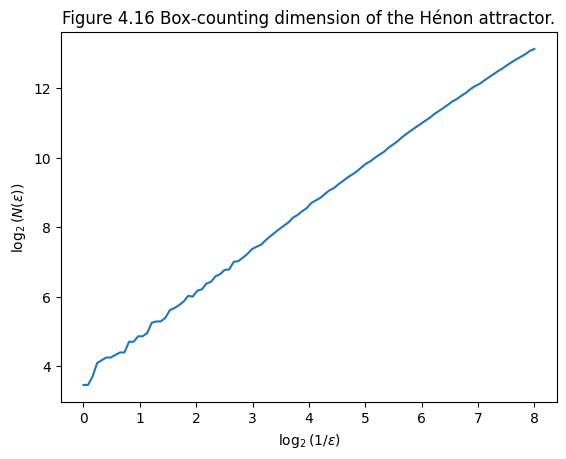

In [123]:
plt.plot(-np.log2(eps), np.log2(n_eps))
plt.xlabel("$\\log_2(1/\\varepsilon)$")
plt.ylabel("$\\log_2(N(\\varepsilon))$")
plt.title("Figure 4.16 Box-counting dimension of the Hénon attractor.")

In [124]:
from scipy import stats
x_ = -np.log2(eps)
y_ = np.log2(n_eps)

mask = x_ > 1
x_ = x_[mask]
y_ = y_[mask]

result = stats.linregress(x_, y_)
print(f"boxdim = {result.slope}")


boxdim = 1.1928072477812866


# Exercício 3

Obtenha a dimensão de correlação do atrator de Hénon como na fig. 4.17.

Pela definição de dimensão de correlação, temos que:

$$d = \lim_{\varepsilon \to 0^+} \frac{\log C(r)}{\log r}$$

Em que $C(r)$ é a função de correlação, definida como:

$$C(r) = \lim_{N \to \infty} \frac{|\{(w_1, w_2) | w_1, w_2 \in S_N, |w_1 - w_2| < r\}|}{|\{(w_1, w_2) | w_1, w_2 \in S_N\}|}$$

Assim como no item anterior, podemos obter uma aproximação da dimensão de correlação por meio da regressão linear no gráfico $\log C(r)$ x $\log r$. Para isso, basta calcular (de forma aproximada) $C(r)$ para cada $r$ e plotar o gráfico. 

In [125]:
n = len(x)
denom = n*(n-1)/2

In [126]:
from scipy.spatial import cKDTree


points = np.column_stack((x, y))
tree = cKDTree(points)

num = 10
r = np.logspace(-8, -2, base=2, num=num)
f = lambda x: tree.count_neighbors(tree,x)
n_r = np.vectorize(f)(r)
c_r = n_r / denom


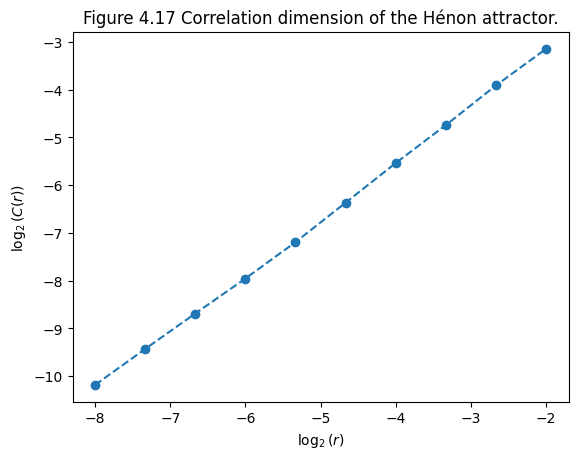

In [127]:
plt.plot(np.log2(r), np.log2(c_r), linestyle='--', marker='o')
plt.xlabel("$\\log_2(r)$")
plt.ylabel("$\\log_2(C(r))$")
plt.title("Figure 4.17 Correlation dimension of the Hénon attractor.")
plt.show()

In [128]:
result = stats.linregress(np.log2(r), np.log2(c_r))
print(f"corrdim = {result.slope}")

corrdim = 1.1790409768002996
